In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob
from google.colab import drive
import collections
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow import keras

In [ ]:
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
data_training1 = pd.read_csv("/content/drive/MyDrive/Tugas_Akhir/Dataset_Fix_Banget2/Training1.csv",delimiter=",")
data_training1

,Count1,Count2,Lk,Label
0,7,7,0.612025,1
1,11,12,0.615690,1
2,16,10,0.611005,1
3,13,12,0.587183,1
4,13,10,0.615405,1
...,...,...,...,...
223,6,0,0.575107,1
224,9,9,0.590665,1
225,7,7,0.597020,1
226,14,14,0.592879,1


In [ ]:
data_training0 = pd.read_csv("/content/drive/MyDrive/Tugas_Akhir/Dataset_Fix_Banget2/Training0.csv",delimiter=",")
data_training0

,Count1,Count2,Lk,Label
0,11,15,0.668962,0
1,11,19,0.612092,0
2,11,16,0.669262,0
3,7,4,0.665858,0
4,12,21,0.607230,0
...,...,...,...,...
223,3,16,0.607929,0
224,12,19,0.639959,0
225,7,9,0.665825,0
226,10,19,0.605040,0


In [ ]:
data_testing1 = pd.read_csv("/content/drive/MyDrive/Tugas_Akhir/Dataset_Fix_Banget2/Testing1.csv",delimiter=",")
data_testing1

,Count1,Count2,Lk,Label
0,9,10,0.594610,1
1,12,13,0.578640,1
2,5,5,0.576761,1
3,13,12,0.580850,1
4,9,6,0.603825,1
...,...,...,...,...
72,6,10,0.594353,1
73,6,5,0.616009,1
74,9,11,0.598071,1
75,10,8,0.604245,1


In [ ]:
data_testing0 = pd.read_csv("/content/drive/MyDrive/Tugas_Akhir/Dataset_Fix_Banget2/Testing0.csv",delimiter=",")
data_testing0

,Count1,Count2,Lk,Label
0,10,36,0.664195,0
1,9,13,0.667183,0
2,11,23,0.633647,0
3,21,29,0.665543,0
4,11,24,0.624831,0
...,...,...,...,...
72,13,31,0.663012,0
73,11,13,0.609273,0
74,10,22,0.602088,0
75,10,24,0.605639,0


In [ ]:
datatrainingall = data_training1.merge(data_training0,how='outer')
datatestingall = data_testing1.merge(data_testing0,how='outer')

In [ ]:
y_train = datatrainingall['Label']
X_train = datatrainingall.drop(['Label'],axis=1)
y_test = datatestingall['Label']
X_test = datatestingall.drop(['Label'],axis=1)

In [ ]:
#ANN Setting

model = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(3),
tf.keras.layers.Dense(60,name="Hidden_1"),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(40, name="Hidden_2"),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(20, activation='relu', name="Hidden_3"),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(1, activation='sigmoid',name="Output")
],
name="Sequential")
# model.summary()

model.compile(optimizer='nadam',
            loss="binary_crossentropy",
            metrics=['accuracy'])
# "binary_crossentropy"
# model.compile(optimizer='adam',
#             loss="mean_squared_error",
#             metrics=['accuracy'])


#Checkpoint to save the best accuracy
checkpoint_filepath = '/content/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
# model = get_basic_model()
history=model.fit(X_train,y_train, epochs=900, validation_data=(X_test,y_test), batch_size=16,callbacks=model_checkpoint_callback)
model.summary()

Epoch 1/900
29/29 [==============================] - 2s 11ms/step - loss: 2.6287 - accuracy: 0.5154 - val_loss: 0.7639 - val_accuracy: 0.5000
Epoch 2/900
29/29 [==============================] - 0s 4ms/step - loss: 1.5802 - accuracy: 0.5285 - val_loss: 0.5985 - val_accuracy: 0.5584
Epoch 3/900
29/29 [==============================] - 0s 4ms/step - loss: 1.2515 - accuracy: 0.5417 - val_loss: 0.6030 - val_accuracy: 0.6299
Epoch 4/900
29/29 [==============================] - 0s 4ms/step - loss: 0.9396 - accuracy: 0.5592 - val_loss: 0.5802 - val_accuracy: 0.8182
Epoch 5/900
29/29 [==============================] - 0s 3ms/step - loss: 0.9035 - accuracy: 0.5768 - val_loss: 0.6110 - val_accuracy: 0.7857
Epoch 6/900
29/29 [==============================] - 0s 4ms/step - loss: 0.7600 - accuracy: 0.6272 - val_loss: 0.6101 - val_accuracy: 0.7662
Epoch 7/900
29/29 [==============================] - 0s 4ms/step - loss: 0.7113 - accuracy: 0.6184 - val_loss: 0.6045 - val_accuracy: 0.7857
Epoch 8/900


In [ ]:

# my_callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# history = model.fit(
#     X_train,y_train,
#     validation_data=(X_test, y_test),
#     batch_size=8,
#     epochs=600,
#     callbacks=[my_callbacks]
# )

Text(0.5, 1.0, 'Training and Validation Loss')

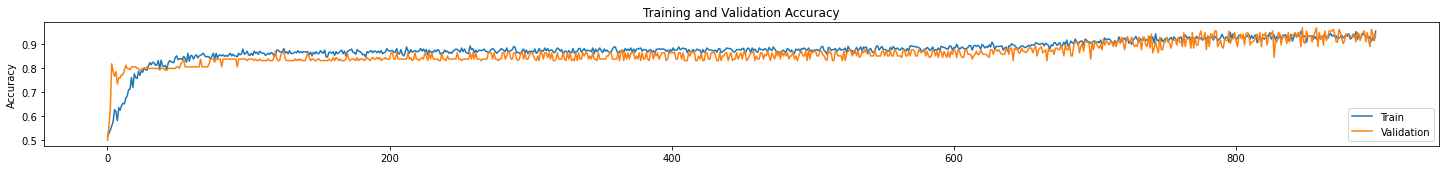

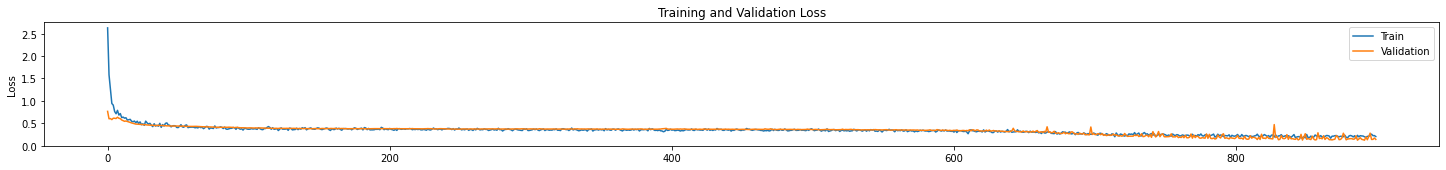

In [ ]:
my_acc = history.history['accuracy']
my_val_acc = history.history['val_accuracy']

# plot accuracy
plt.figure(figsize=(25, 5))
plt.subplot(2,1,1)
plt.plot(my_acc, label='Train')
plt.plot(my_val_acc, label='Validation')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# visualize the loss training history
my_loss = history.history['loss']
my_val_loss = history.history['val_loss']

# plot loss
plt.figure(figsize=(25, 5))
plt.subplot(2,1,1)
plt.plot(my_loss, label='Train')
plt.plot(my_val_loss, label='Validation')
plt.legend(loc='upper right')
plt.ylabel('Loss')
# plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Loss')

In [ ]:
for i in model.layers:
  print(i)

In [ ]:
# model.load_weights(checkpoint_filepath) #To load the checkpoint
print(model.layers[0].weights) #Print Weight and Bias in Hidden Layer 1
print(model.layers[1].weights) #Print Weight and Bias in Hidden Layer 2
print(model.layers[2].weights) #Print Weight and Bias in Hidden Layer 3
print(model.layers[3].weights) #Print Weight and Bias in Hidden Layer 3 

[<tf.Variable 'Hidden_1/kernel:0' shape=(3, 60) dtype=float32, numpy=
array([[-3.70910903e-03,  3.89871411e-02, -1.23567702e-02,
        -6.46876097e-02,  1.65998731e-02,  1.52672946e-01,
         4.16935747e-03, -5.21517312e-03, -2.12990995e-02,
        -3.03146802e-02, -7.56022101e-03,  3.36898118e-03,
        -5.79521395e-02, -3.13771144e-03,  5.11607272e-04,
        -1.19718499e-02, -3.61733400e-04,  1.03305444e-01,
        -3.52167044e-05, -2.15411722e-03,  1.11046083e-01,
         9.22740549e-02, -1.35231717e-02, -3.76294367e-02,
        -3.77323255e-02,  1.22610126e-02, -3.64070050e-02,
        -7.52633251e-03, -4.10780450e-03, -4.80196849e-02,
         5.64905233e-04,  3.52706052e-02, -1.11816011e-01,
         4.61540520e-02, -7.93187171e-02, -8.06731731e-03,
        -9.51711845e-04, -9.02543217e-02,  1.63797319e-01,
         4.14168574e-02, -5.13364971e-02, -3.21852555e-03,
        -1.14949264e-01, -6.68945955e-03,  7.32726138e-03,
         2.77670529e-02,  1.75000913e-02, -2.

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
simpanweight = model.layers[0].weights
np.savetxt('Weights1.txt', simpanweight ,fmt='%s')

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:1378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(X)


In [ ]:
simpanweight1 = model.layers[2].weights
np.savetxt('Weights2.txt', simpanweight1 ,fmt='%s')

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:1378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(X)


In [ ]:
simpanweight2 = model.layers[4].weights
np.savetxt('Weights3.txt', simpanweight2 ,fmt='%s')

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:1378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(X)


In [ ]:
simpanweight3 = model.layers[6].weights
np.savetxt('Output_Layer.txt', simpanweight3 ,fmt='%s')

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:1378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(X)


In [ ]:
#Prediction using data test
prediction = model.predict(X_test)
prediction

array([[9.67603803e-01],
       [9.74179924e-01],
       [9.97651935e-01],
       [9.87983346e-01],
       [9.94266272e-01],
       [9.28138256e-01],
       [9.97991800e-01],
       [9.92059708e-01],
       [9.41015124e-01],
       [9.93098974e-01],
       [9.71988201e-01],
       [7.82587290e-01],
       [6.89188778e-01],
       [9.82862830e-01],
       [8.92670631e-01],
       [8.53064060e-01],
       [9.86650825e-01],
       [9.50089812e-01],
       [9.99491930e-01],
       [9.62502837e-01],
       [9.94185865e-01],
       [9.98160899e-01],
       [9.96714830e-01],
       [9.99517202e-01],
       [9.84168291e-01],
       [8.51950049e-01],
       [9.82207537e-01],
       [9.70130444e-01],
       [9.96773660e-01],
       [9.83239055e-01],
       [9.98178065e-01],
       [9.69310045e-01],
       [9.86651480e-01],
       [9.97049689e-01],
       [9.92567718e-01],
       [9.77398574e-01],
       [9.98417974e-01],
       [9.57390010e-01],
       [9.79572892e-01],
       [9.94746447e-01],


In [ ]:
#Change the result of prediction into binary
for i in range(len(prediction)):
    if prediction[i] >= 0.5:
      prediction[i]=1
    else: prediction[i]=0
    print(prediction[i])

[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[1.]
[0.]
[1.]
[0.]
[0.]
[1.]
[0.]
[1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[1.]
[0.]
[0.]
[1.]


              precision    recall  f1-score   support

           0       0.99      0.90      0.94        77
           1       0.90      0.99      0.94        77

    accuracy                           0.94       154
   macro avg       0.95      0.94      0.94       154
weighted avg       0.95      0.94      0.94       154



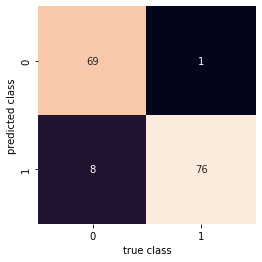

In [ ]:
import seaborn as sns
#Confussion Matrix

conmat=confusion_matrix(y_test,prediction)
sns.heatmap(conmat.T, square=True, annot=True, fmt='d', cbar=False) 
plt.xlabel('true class') 
plt.ylabel('predicted class')
print(classification_report(y_test,prediction))

In [ ]:
print('data testing')
accuracy = (conmat[0,0]+conmat[1,1])/(conmat[0,0]+conmat[0,1]+conmat[1,0]+conmat[1,1])
print('akurasi :', accuracy)

sensitivity1 = conmat[0,0]/(conmat[0,0]+conmat[0,1])
print('sensitivitas : ', sensitivity1 )

specificity1 = conmat[1,1]/(conmat[1,0]+conmat[1,1])
print('spesifisitas : ', specificity1)

precision1 = conmat[0,0]/(conmat[0,0]+conmat[1,0])
print('presisi : ', precision1 )

data testing
akurasi : 0.9415584415584416
sensitivitas :  0.8961038961038961
spesifisitas :  0.987012987012987
presisi :  0.9857142857142858


In [ ]:
#Prediction using data test
prediction2 = model.predict(X_train)
prediction2

array([[9.67971921e-01],
       [7.96734691e-01],
       [9.91266251e-01],
       [9.82421160e-01],
       [9.69616771e-01],
       [5.56848586e-01],
       [9.42635536e-01],
       [9.67825055e-01],
       [9.71022964e-01],
       [9.97461915e-01],
       [9.85277116e-01],
       [9.72407699e-01],
       [9.56212223e-01],
       [9.48196590e-01],
       [3.65225255e-01],
       [9.92624640e-01],
       [9.80812669e-01],
       [1.06599808e-01],
       [9.58716810e-01],
       [9.46726143e-01],
       [6.58395529e-01],
       [9.81614828e-01],
       [9.96037602e-01],
       [9.95953619e-01],
       [9.62427258e-01],
       [9.72438216e-01],
       [9.72063243e-01],
       [9.56083953e-01],
       [9.92976308e-01],
       [9.63057458e-01],
       [9.92949009e-01],
       [9.46446598e-01],
       [9.98670101e-01],
       [9.74289060e-01],
       [9.74191070e-01],
       [9.98449326e-01],
       [9.77234602e-01],
       [9.56970870e-01],
       [9.86803532e-01],
       [9.98082817e-01],


In [ ]:
#Change the result of prediction into binary
for i in range(len(prediction2)):
    if prediction2[i] >= 0.5:
      prediction2[i]=1
    else: prediction2[i]=0
    print(prediction2[i])

[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


              precision    recall  f1-score   support

           0       0.97      0.94      0.96       228
           1       0.94      0.97      0.96       228

    accuracy                           0.96       456
   macro avg       0.96      0.96      0.96       456
weighted avg       0.96      0.96      0.96       456



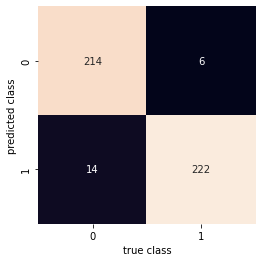

In [ ]:
#Confussion Matrix Training Data

conmat2=confusion_matrix(y_train,prediction2)
sns.heatmap(conmat2.T, square=True, annot=True, fmt='d', cbar=False) 
plt.xlabel('true class') 
plt.ylabel('predicted class')
print(classification_report(y_train,prediction2))

In [ ]:
print('data training')
accuracy2 = (conmat2[0,0]+conmat2[1,1])/(conmat2[0,0]+conmat2[0,1]+conmat2[1,0]+conmat2[1,1])
print('akurasi :', accuracy2)

sensitivity2 = conmat2[0,0]/(conmat2[0,0]+conmat2[0,1])
print('sensitivitas : ', sensitivity2 )

specificity2 = conmat2[1,1]/(conmat2[1,0]+conmat2[1,1])
print('spesifisitas : ', specificity2)

precision2 = conmat2[0,0]/(conmat2[0,0]+conmat2[1,0])
print('presisi : ', precision2 )

data training
akurasi : 0.956140350877193
sensitivitas :  0.9385964912280702
spesifisitas :  0.9736842105263158
presisi :  0.9727272727272728


In [ ]:
gabung = datatrainingall.merge(datatestingall,how='outer')

In [ ]:
y = gabung['Label']
X = gabung.drop(['Label'],axis=1)

In [ ]:
prediction3 = model.predict(X)

In [ ]:
for i in range(len(prediction3)):
    if prediction3[i] >= 0.5:
      prediction3[i]=1
    else: prediction3[i]=0


              precision    recall  f1-score   support

           0       0.98      0.93      0.95       305
           1       0.93      0.98      0.95       305

    accuracy                           0.95       610
   macro avg       0.95      0.95      0.95       610
weighted avg       0.95      0.95      0.95       610



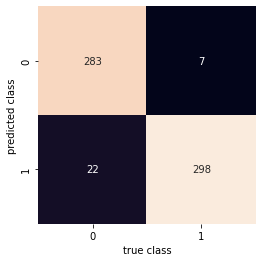

In [ ]:
#Confussion Matrix Training Data

conmat3=confusion_matrix(y,prediction3)
sns.heatmap(conmat3.T, square=True, annot=True, fmt='d', cbar=False) 
plt.xlabel('true class') 
plt.ylabel('predicted class')
print(classification_report(y,prediction3))